# Regresion lineal simple

## Importar las librerías

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos

In [8]:
datos = pd.read_csv('Salarios.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

> Nota: es buena práctica tener la variable independiente a la derecha y la variable dependiente a la izquierda y facilita hacer los cálculos

In [9]:
datos.head()

,AniosExperiencia,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## División del conjunto de datos en un conjunto para entrenamiento y otro para pruebas

In [10]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Entrenamiento del modelo de regresión lineal simple con el conjunto de datos para entrenamiento

In [11]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_entreno, y_entreno)

LinearRegression()

## Predicción de los resultados del conjunto de prueba

In [12]:
y_pred = regresor.predict(X_prueba)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


## Visualización de los resultados con el conjunto de entrenamiento

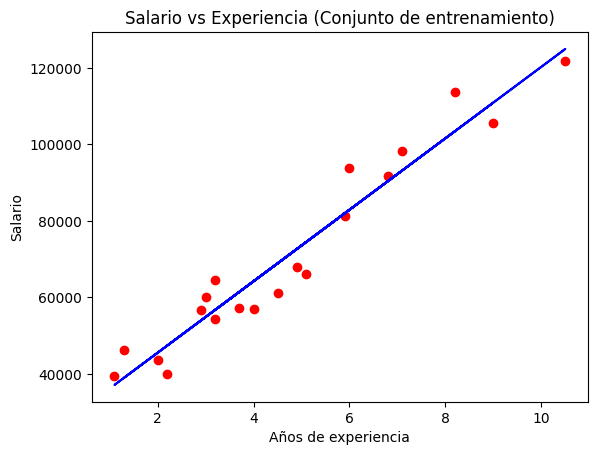

In [13]:
plt.scatter(X_entreno, y_entreno, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

> Los datos graficados son los datos de entrenamiento porque será la entrada para el modelo, no se quiere sobre los de prueba porque saldrá una regresión diferente.

## Visualizando los resultados con el conjunto para pruebas

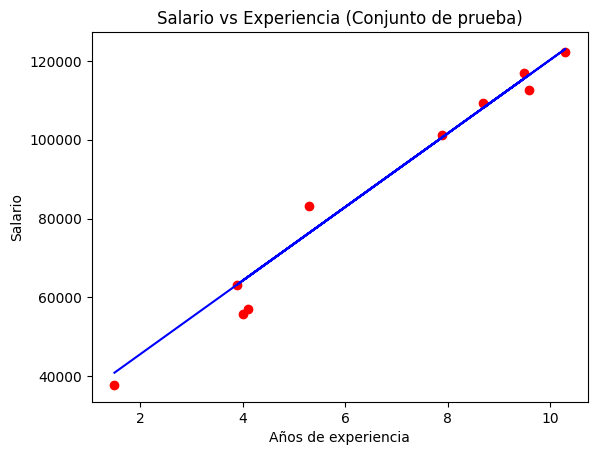

In [14]:
plt.scatter(X_prueba, y_prueba, color = 'red')
#plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')  #Pregunta:  Si esto es para pruebas, porqué se usa entreno?
plt.plot(X_prueba, y_pred, color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de prueba)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

### ¿Cómo se hace una sola predicción?

Ejemplo:  Queremos predecir el salario de una persona con 12 años de experiencia

In [15]:
print(regresor.predict([[12]]))

[138967.5015615]


> Nota: se encierra en doble corchetes porque predict() recibe una arreglo de 2 dimensiones.

**Nota importante:** Note que el valor de la característica (12 años) se ingresó con una doble pareja de corchetes cuadrados.  Eso se hace porque el método "predict"siempre espera un arreglo de dos dimensiones (2D) como el formato de lo que recibe.  Al poner el 12 entre una doble pareja de corochetes se logra que este sea exactamente un arreglo 2D. En otras palabras:

$12 \rightarrow \textrm{escalar}$

$[12] \rightarrow \textrm{arreglo 1D}$

$[[12]] \rightarrow \textrm{arreglo 2D}$

### ¿Cómo se obtienen los coeficientes de la línea de regresióm?

In [16]:
print(regresor.coef_)
print(regresor.intercept_)

[9345.94244312]
26816.192244031183


Nota:  Véase que se invocaron los atributos coef_ e intercept_.  Estos son diferentes a los métodos.  En Python, los atributos generalmente devuelven un único valor o un arreglo de valores